In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import csv
import matplotlib as mpl
import matplotlib.pyplot as plt

In [18]:
path_to_file = 'flight_delays.csv'
df = pd.read_csv(path_to_file, sep=',')
f = df[(df['dep_delayed_15min'] == 'N')]
f

,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance,dep_delayed_15min
0,c-8,c-21,c-7,1934,AA,ATL,DFW,732,N
1,c-4,c-20,c-3,1548,US,PIT,MCO,834,N
2,c-9,c-2,c-5,1422,XE,RDU,CLE,416,N
3,c-11,c-25,c-6,1015,OO,DEN,MEM,872,N
5,c-8,c-3,c-4,1918,NW,MEM,MCO,683,N
...,...,...,...,...,...,...,...,...,...
99995,c-5,c-4,c-3,1618,OO,SFO,RDD,199,N
99996,c-1,c-18,c-3,804,CO,EWR,DAB,884,N
99997,c-1,c-24,c-2,1901,NW,DTW,IAH,1076,N
99998,c-4,c-27,c-4,1515,MQ,DFW,GGG,140,N


1.Доля всех задержек ко всем вылетам

In [20]:
df.groupby('dep_delayed_15min')['UniqueCarrier'].count()

dep_delayed_15min
N    80956
Y    19044
Name: UniqueCarrier, dtype: int64

In [24]:
import plotly.express as px

fig = px.pie(df.groupby('dep_delayed_15min')['UniqueCarrier'].count(), values='UniqueCarrier', names='UniqueCarrier', title='Delays')
fig.show()

2. зависимость количества задержек от длины пути, который предстоит пролететь самолёту

(0.0, 340.0)

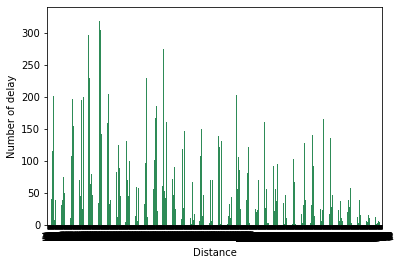

In [55]:
from_distance = f.groupby('Distance')['dep_delayed_15min'].count()
from_distance = from_distance.plot(kind="bar", rot=5, fontsize=10, color = 'seagreen')
from_distance.set_ylabel("Number of delay")
from_distance.set_xlabel("Distance")
plt.ylim([0, 340])

3. Tоп 5 направлений, для которых чаще всего происходят задержки

Text(0.5, 0, 'Direction')

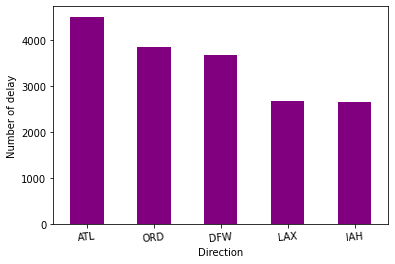

In [48]:
five_bad_directions = f.groupby('Dest')['dep_delayed_15min'].count().sort_values(ascending=False).head(5)
five_bad_directions = five_bad_directions.plot(kind="bar", rot=5, fontsize=10, color = 'purple')
five_bad_directions.set_ylabel("Number of delay")
five_bad_directions.set_xlabel("Direction")


4. В какие времена года чаще всего происходят задержки рейсов

(19100.0, 21000.0)

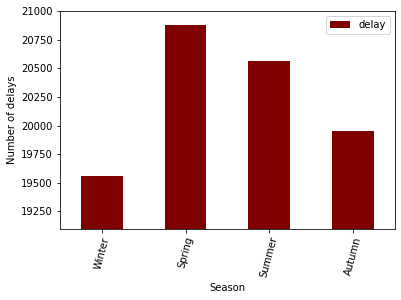

In [41]:
per_month = f.groupby('Month')['dep_delayed_15min'].count()
seasons = ['Winter','Spring', 'Summer', 'Autumn']
starts_of_seasons = [1, 4, 7, 9]
data = []
per_season = 0
for i in range(1, 13):
    per_season += per_month[f'c-{i}'] 
    if i%3==0:
      data.append(per_season)
      per_season = 0

seasons_data = pd.DataFrame(data, index = seasons, columns = ['delay'])
temp = seasons_data.plot(kind='bar', rot=75, color='maroon');
temp.set_xlabel("Season")
temp.set_ylabel("Number of delays")
plt.ylim([19100, 21000])




5. Топ 10 самых хороших перевозчиков, которые реже всего задерживают свои рейсы


Text(0.5, 0, 'Company')

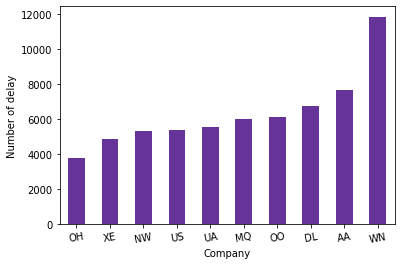

In [43]:
tail_ten_comp = f.groupby('UniqueCarrier')['dep_delayed_15min'].count().sort_values(ascending=True).tail(10)
tail_ten_comp = tail_ten_comp.plot(kind="bar", rot=10, fontsize=10, color = 'rebeccapurple')
tail_ten_comp.set_ylabel("Number of delay")
tail_ten_comp.set_xlabel("Company")

6. Топ 10 самых безответственных аэропортов, в которых чаще всего происходят задержки


Text(0.5, 0, 'Airport')

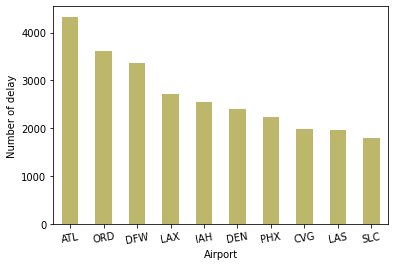

In [46]:
bad_airports = f.groupby('Origin')['dep_delayed_15min'].count().sort_values(ascending=False).head(10)
Smth_after_that = bad_airports.plot(x="airport", y="Delay", kind="bar", rot=10, fontsize=10, color = 'darkkhaki')
Smth_after_that.set_ylabel("Number of delay")
Smth_after_that.set_xlabel("Airport")